In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Out_SCL = np.load("Feature_bank_cifar100_final_acc_1_easy0.0_Seed_0False.npy")
Out_HSCL_2 = np.load("Feature_bank_cifar100_final_acc_1_hard2.0_Seed_0False.npy")
Out_HSCL_5 = np.load("Feature_bank_cifar100_final_acc_1_hard5.0_Seed_0False.npy")
Out_HSCL_10 = np.load("Feature_bank_cifar100_final_acc_1_hard10.0_Seed_0False.npy")
Out_HSCL_30 = np.load("Feature_bank_cifar100_final_acc_1_hard30.0_Seed_0False.npy")


Text(0.5, 1.0, 'Sorted normalized singular value')

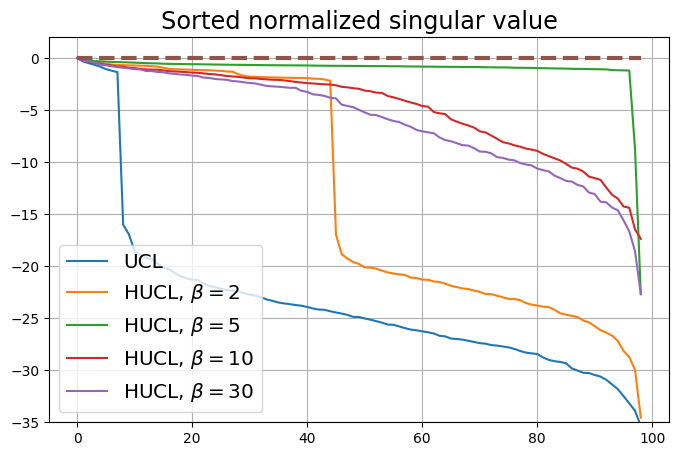

In [3]:
k = 399
plt.figure(figsize=(8, 5))

Cov_SCL = np.cov(Out_SCL[k].T)
Cov_HSCL_2 = np.cov(Out_HSCL_2[k].T)
Cov_HSCL_5 = np.cov(Out_HSCL_5[k].T)
Cov_HSCL_10 = np.cov(Out_HSCL_10[k].T)
Cov_HSCL_30 = np.cov(Out_HSCL_30[k].T)
init = np.cov(Out_SCL[0].T)

a,b_base,c = np.linalg.svd(Cov_SCL)
a,b_2,c = np.linalg.svd(Cov_HSCL_2)
a,b_5,c = np.linalg.svd(Cov_HSCL_5)
a,b_10,c = np.linalg.svd(Cov_HSCL_10)
a,b_30,c = np.linalg.svd(Cov_HSCL_30)
a,b_init,c = np.linalg.svd(init)

plt.plot(np.log(b_base/max(b_base)), label = "UCL")
plt.plot(np.log(b_2/max(b_2)), label = r"HUCL, $\beta = 2$")
plt.plot(np.log(b_5/max(b_5)), label = r"HUCL, $\beta = 5$")
plt.plot(np.log(b_10/max(b_10)), label = r"HUCL, $\beta = 10$")
plt.plot(np.log(b_30/max(b_30)), label = r"HUCL, $\beta = 30$")
plt.plot(np.zeros(99), linestyle='dashed', linewidth=3)

plt.ylim([-35, 2])
plt.grid()
plt.legend(fontsize='x-large')
plt.title("Sorted normalized singular value", fontsize='xx-large')

Text(0.5, 1.0, 'Unit-norm condition')

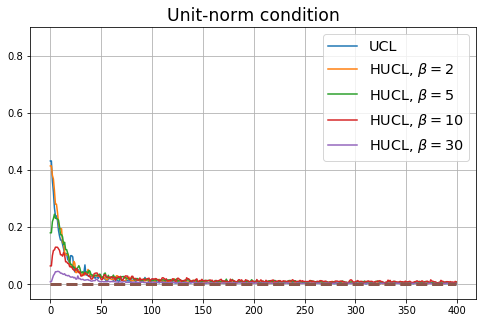

In [5]:
plt.figure(figsize=(8, 5))


norms_scl = np.mean(np.abs(np.linalg.norm(Out_SCL, axis=2)-1),1)[:400]
norms_hscl_2 = np.mean(np.abs(np.linalg.norm(Out_HSCL_2, axis=2)-1),1)[:400]
norms_hscl_5 = np.mean(np.abs(np.linalg.norm(Out_HSCL_5, axis=2)-1),1)[:400]
norms_hscl_10 = np.mean(np.abs(np.linalg.norm(Out_HSCL_10, axis=2)-1),1)[:400]
norms_hscl_30 = np.mean(np.abs(np.linalg.norm(Out_HSCL_30, axis=2)-1),1)[:400]

plt.plot(norms_scl, label = "UCL")
plt.plot(norms_hscl_2, label = r"HUCL, $\beta = 2$")
plt.plot(norms_hscl_5, label = r"HUCL, $\beta = 5$")
plt.plot(norms_hscl_10, label = r"HUCL, $\beta = 10$")
plt.plot(norms_hscl_30, label = r"HUCL, $\beta = 30$")
plt.plot(np.zeros(400), linestyle='dashed', linewidth=3)


plt.legend()
plt.ylim([-0.05, 0.9])
plt.grid()
plt.legend(fontsize='x-large')
plt.title("Unit-norm condition", fontsize='xx-large')

Text(0.5, 1.0, 'Zero-sum condition')

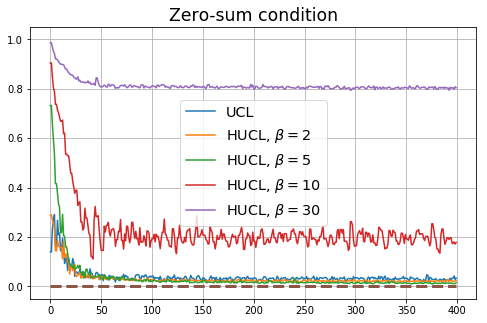

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a dummy Out_SCL for demonstration
# You would use your own data in practice

# Calculate the mean for each epoch
plt.figure(figsize=(8, 5))

norms_scl = np.linalg.norm(np.mean(Out_SCL, axis=1), axis=1)[:400]
norms_hscl_2 = np.linalg.norm(np.mean(Out_HSCL_2, axis=1), axis=1)[:400]
norms_hscl_5 = np.linalg.norm(np.mean(Out_HSCL_5, axis=1), axis=1)[:400]
norms_hscl_10 = np.linalg.norm(np.mean(Out_HSCL_10, axis=1), axis=1)[:400]
norms_hscl_30 = np.linalg.norm(np.mean(Out_HSCL_30, axis=1), axis=1)[:400]


plt.plot(norms_scl, label = "UCL")
plt.plot(norms_hscl_2, label = r"HUCL, $\beta = 2$")
plt.plot(norms_hscl_5, label = r"HUCL, $\beta = 5$")
plt.plot(norms_hscl_10, label = r"HUCL, $\beta = 10$")
plt.plot(norms_hscl_30, label = r"HUCL, $\beta = 30$")
plt.plot(np.zeros(400), linestyle='dashed', linewidth=3)


plt.legend()
plt.ylim([-0.05, 1.05])
plt.grid()
plt.legend(fontsize='x-large')
plt.title("Zero-sum condition", fontsize='xx-large')

In [7]:
std_SCL = []
avg_SCL = []

number_epoch = 399
number_class = 100

for epoch in range(number_epoch):
    test = Out_SCL[epoch]
    
    test_2 = test
    test_3 = test_2 / np.sqrt((test_2**2).sum(1)).reshape(number_class,1)
    cos = np.matmul(test_3, test_3.T)
    cos_ls = []
    for i in range(number_class):
        for j in range(number_class):
            if i != j:
                cos_ls.append(cos[i, j])
    std_SCL.append(np.max(np.abs(np.array(cos_ls) + 1/(number_class - 1))))
    avg_SCL.append(np.mean(np.abs(np.array(cos_ls) + 1/(number_class - 1))))
    
    

std_HSCL_2 = []
avg_HSCL_2 = []
for epoch in range(number_epoch):
    test = Out_HSCL_2[epoch]
    
    test_2 = test
    test_3 = test_2 / np.sqrt((test_2**2).sum(1)).reshape(number_class,1)
    cos = np.matmul(test_3, test_3.T)
    cos_ls = []
    for i in range(number_class):
        for j in range(number_class):
            if i != j:
                cos_ls.append(cos[i, j])
    std_HSCL_2.append(np.max(np.abs(np.array(cos_ls) + 1/(number_class - 1))))
    avg_HSCL_2.append(np.mean(np.abs(np.array(cos_ls) + 1/(number_class - 1))))
    
std_HSCL_5 = []
avg_HSCL_5 = []
for epoch in range(number_epoch):
    test = Out_HSCL_5[epoch]
    
    test_2 = test
    test_3 = test_2 / np.sqrt((test_2**2).sum(1)).reshape(number_class,1)
    cos = np.matmul(test_3, test_3.T)
    cos_ls = []
    for i in range(number_class):
        for j in range(number_class):
            if i != j:
                cos_ls.append(cos[i, j])
    std_HSCL_5.append(np.max(np.abs(np.array(cos_ls) + 1/(number_class - 1))))
    avg_HSCL_5.append(np.mean(np.abs(np.array(cos_ls) + 1/(number_class - 1))))
    
std_HSCL_10 = []
avg_HSCL_10 = []
for epoch in range(number_epoch):
    test = Out_HSCL_10[epoch]
    
    test_2 = test
    test_3 = test_2 / np.sqrt((test_2**2).sum(1)).reshape(number_class,1)
    cos = np.matmul(test_3, test_3.T)
    cos_ls = []
    for i in range(number_class):
        for j in range(number_class):
            if i != j:
                cos_ls.append(cos[i, j])
    std_HSCL_10.append(np.max(np.abs(np.array(cos_ls) + 1/(number_class - 1))))
    avg_HSCL_10.append(np.mean(np.abs(np.array(cos_ls) + 1/(number_class - 1))))
    
std_HSCL_30 = []
avg_HSCL_30 = []
for epoch in range(number_epoch):
    test = Out_HSCL_30[epoch]
    
    test_2 = test
    test_3 = test_2 / np.sqrt((test_2**2).sum(1)).reshape(number_class,1)
    cos = np.matmul(test_3, test_3.T)
    cos_ls = []
    for i in range(number_class):
        for j in range(number_class):
            if i != j:
                cos_ls.append(cos[i, j])
    std_HSCL_30.append(np.max(np.abs(np.array(cos_ls) + 1/(number_class - 1))))
    avg_HSCL_30.append(np.mean(np.abs(np.array(cos_ls) + 1/(number_class - 1))))

Text(0.5, 1.0, 'Equal inner product condition')

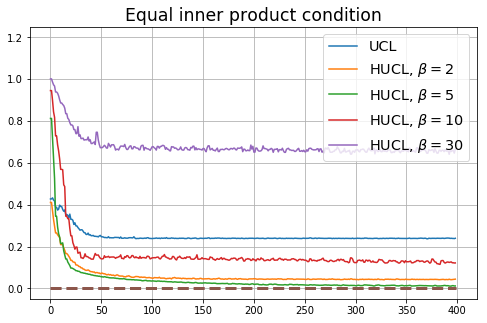

In [8]:
plt.figure(figsize=(8,5))
plt.plot(avg_SCL, label = "UCL")
plt.plot(avg_HSCL_2, label = r"HUCL, $\beta = 2$")
plt.plot(avg_HSCL_5, label = r"HUCL, $\beta = 5$")
plt.plot(avg_HSCL_10, label = r"HUCL, $\beta = 10$")
plt.plot(avg_HSCL_30, label = r"HUCL, $\beta = 30$")
base = np.zeros(400)
plt.plot(np.zeros(400), linestyle='dashed', linewidth=3)
plt.ylim([-0.05, 1.25])

plt.grid()
plt.legend(fontsize='x-large')

#plt.ylabel("Average of |cos similarity| + 1/99", fontsize='xx-large')
plt.title("Equal inner product condition", fontsize='xx-large')

In [9]:
def plot_acc(train = True):
    
    Rep_alpha = []
    Lab_alpha = []
    for i in ['easy0.0', 'hard2.0', 'hard5.0', 'hard10.0', 'hard30.0']:
        Rep = np.load('cifar100_final_acc_1_' + str(i) + '_Seed_0False.npy')[:400]
                        
        Rep_alpha.append(Rep)

    if train:
    
        plt.figure(figsize=(8,5))
        indices = np.arange(0, 400, 5)

        plt.plot(indices, Rep_alpha[0][:,4][indices]*np.sqrt(1), label = "UCL")
        plt.plot(indices, Rep_alpha[1][:,4][indices]*np.sqrt(1), label = r"HUCL, $\beta = 2$")
        plt.plot(indices, Rep_alpha[2][:,4][indices]*np.sqrt(1), label = r"HUCL, $\beta = 5$")
        plt.plot(indices, Rep_alpha[3][:,4][indices]*np.sqrt(1), label = r"HUCL, $\beta = 10$")
        plt.plot(indices, Rep_alpha[4][:,4][indices]*np.sqrt(1), label = r"HUCL, $\beta = 30$")
        number_class = 100
        #base = np.ones(400) * (-np.log(np.exp(1) /( np.exp(1)+np.exp(-1/(number_class-1)))))
        #plt.plot(base, linestyle='dashed', linewidth=3)
        plt.ylim([0, 62])
        plt.grid()
        plt.title('Test Accuracy', fontsize='xx-large')
        #plt.ylabel("Inner distance", fontsize='xx-large')
        plt.legend(fontsize='x-large')
    else:
        plt.figure(figsize=(8,5))
        x_axis = [i+1 for i in range(400)]

        print(Rep_alpha[0].shape)
        # Plotting the values
        plt.plot(x_axis, Rep_alpha[0][:,3]*np.sqrt(1), label="uCL")
        plt.plot(x_axis, Rep_alpha[1][:,3]*np.sqrt(1), label=r"HUCL, $\beta = 2$")
        plt.plot(x_axis, Rep_alpha[2][:,3]*np.sqrt(1), label=r"HUCL, $\beta = 5$")
        plt.plot(x_axis, Rep_alpha[3][:,3]*np.sqrt(1), label=r"HUCL, $\beta = 10$")

        # I noticed that you've plotted Rep_alpha[3] twice. I'm assuming this is a mistake.
        # I've kept it as is, but you might want to adjust it.
        plt.plot(x_axis, Rep_alpha[3][:,3]*np.sqrt(1), label=r"HUCL, $\beta = 30$")

        # Plotting the base line
        base = np.zeros(400)
        plt.grid()
        plt.plot(x_axis, base, linestyle='dashed', linewidth=3)

        # Setting the title and labels
        plt.title('Within-class Variation Collapse', fontsize='x-large')
        #plt.ylabel("Inner distance", fontsize='xx-large')  # This line is commented out based on your code. Uncomment if needed.
        plt.xlabel("Epoch", fontsize='x-large')
        plt.legend(fontsize='x-large')

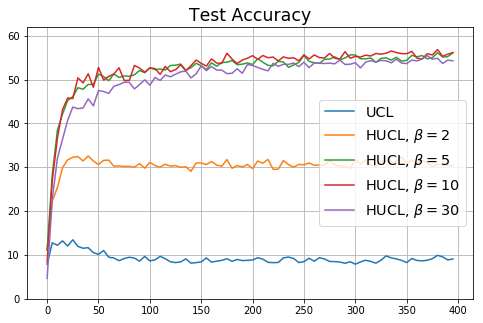

In [10]:
plot_acc(True)